In [1]:
import pandas as pd 
df = pd.read_excel("C:/Users/meetr/Desktop/Fall 2018/Data Science/Mini Project/data.xlsx") 


### Preprocessing #######
ab = df.AB
de = df.DE
ti=df.TI

ab = ab.str.replace('[^\w\s]','')
ab = ab.str.replace('\d+', '')

de = de.str.replace('[^\w\s]','')
de = de.str.replace('\d+', '')

ti = ti.str.replace('[^\w\s]','')
ti = ti.str.replace('\d+', '')

ab=ab.str.lower().str.split()  
de=de.str.lower().str.split()  
ti=ti.str.lower().str.split()  

import pandas as pd
from nltk.corpus import stopwords
stop = stopwords.words('english')

ab = ab.dropna().apply(lambda x: [item for item in x if item not in stop])
de = de.dropna().apply(lambda x: [item for item in x if item not in stop])
ti = ti.dropna().apply(lambda x: [item for item in x if item not in stop])

de = de.append(ti)
ab = de.append(de)

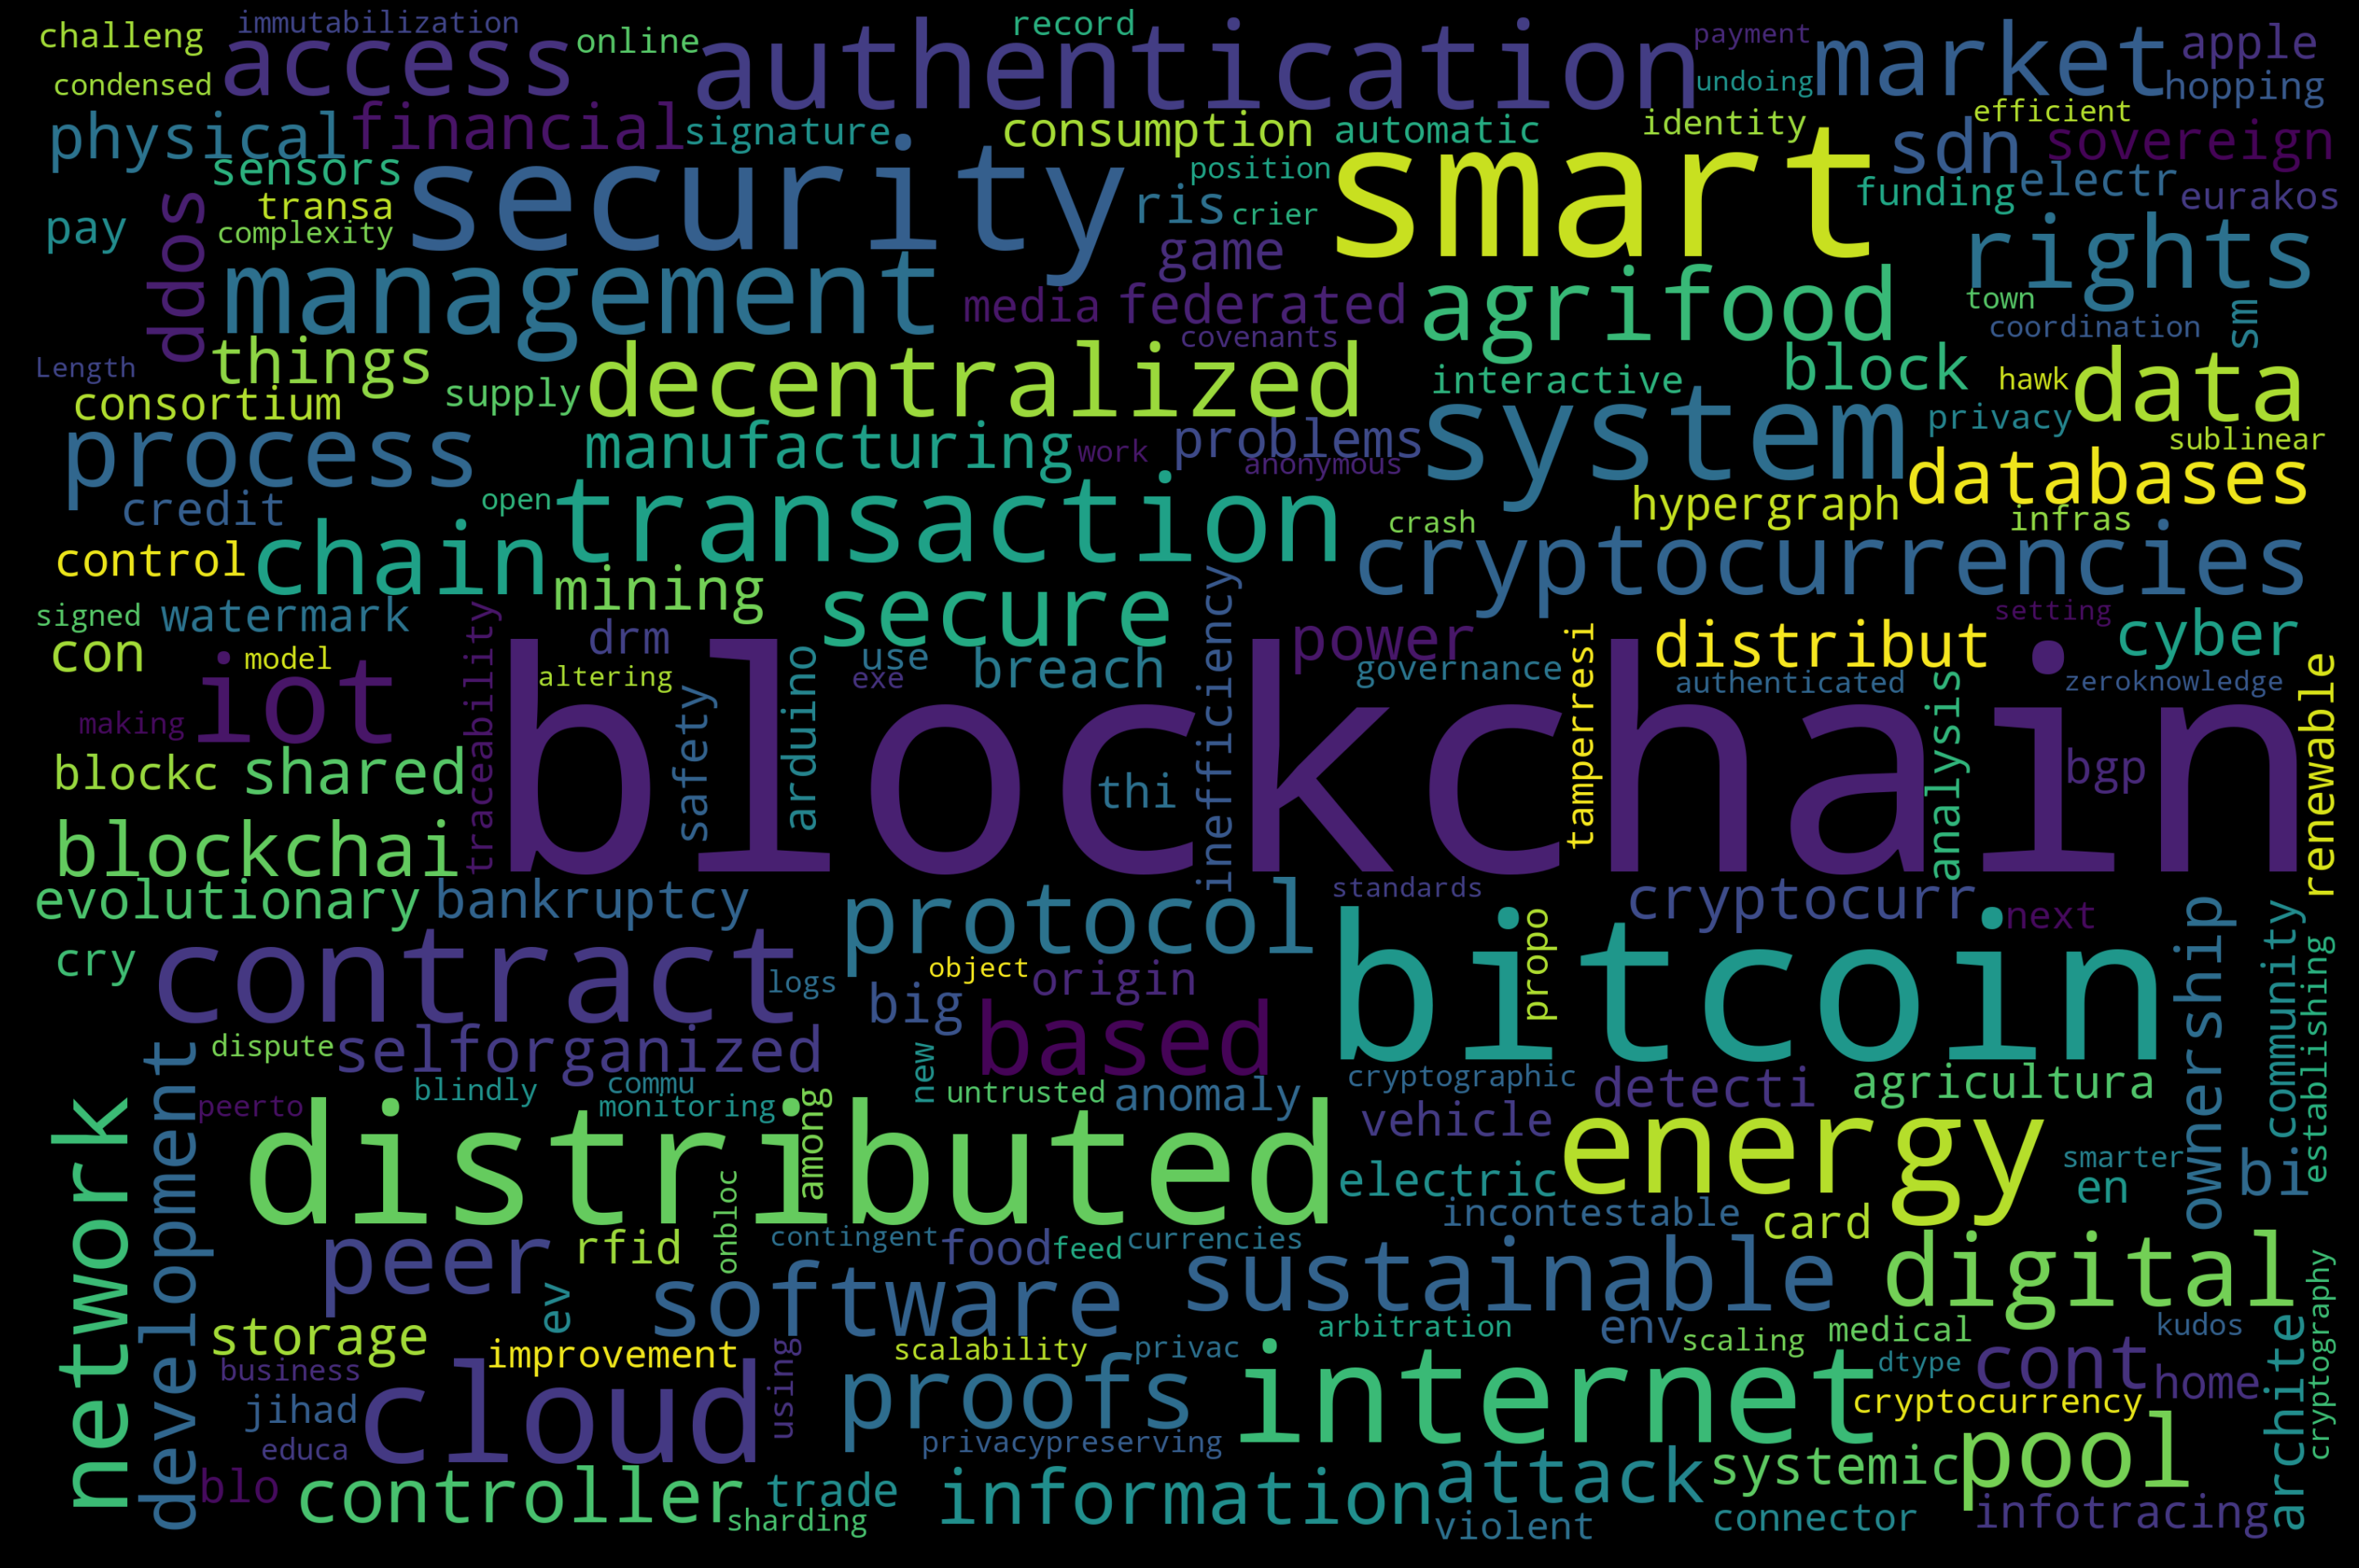

In [2]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud_ab = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(ab))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud_ab, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [3]:
import pandas as pd;
import numpy as np;
import scipy as sp;
import sklearn;
import sys;
from nltk.corpus import stopwords;
import nltk;
from gensim.models import ldamodel
import gensim.corpora;
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;
import pickle;

ab=ab.tolist()
train_headlines = ab

num_topics = 25;

id2word = gensim.corpora.Dictionary(ab)
corpus = [id2word.doc2bow(text) for text in train_headlines]
lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

print(get_lda_topics(lda, num_topics))

C:\Users\meetr\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


        Topic # 01      Topic # 02     Topic # 03      Topic # 04  \
0       blockchain      blockchain     blockchain      blockchain   
1            chain         bitcoin          smart         network   
2          bitcoin      technology       identity           smart   
3       management     distributed       contract         bitcoin   
4           supply          ledger         system          secure   
5       technology           smart         energy           based   
6              use         systems        digital          scheme   
7         research        ethereum          based            data   
8             data          energy           grid         sharing   
9            model    institutions     management    transactions   
10           cloud          system  decentralized          mining   
11         process           based         design           chain   
12         systems  infrastructure     technology           using   
13        analysis       contracts

In [4]:
train_headlines_sentences = [' '.join(text) for text in ab]

vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);
transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)
model = NMF(n_components=num_topics, init='nndsvd');
model.fit(xtfidf_norm)

def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

print(get_nmf_topics(model, 20))  

         Topic # 01        Topic # 02      Topic # 03   Topic # 04  \
0        blockchain             smart         bitcoin   technology   
1          question         contracts         network   blockchain   
2              good          contract              pp    education   
3        eresidency  cryptocurrencies       covenants     taxation   
4         socialism              grid        analysis        using   
5           anomaly              city       anonymity     industry   
6   quantumassisted        blockchain     transaction     medicine   
7    quantumsecured               law      peertopeer     overview   
8       application             legal          bubble  electricity   
9         databases              ipfs    inefficiency       impact   
10           public            cities       forensics     research   
11     institutions         insurance        adoption  development   
12      suitability           visions     propagation  information   
13        signature 

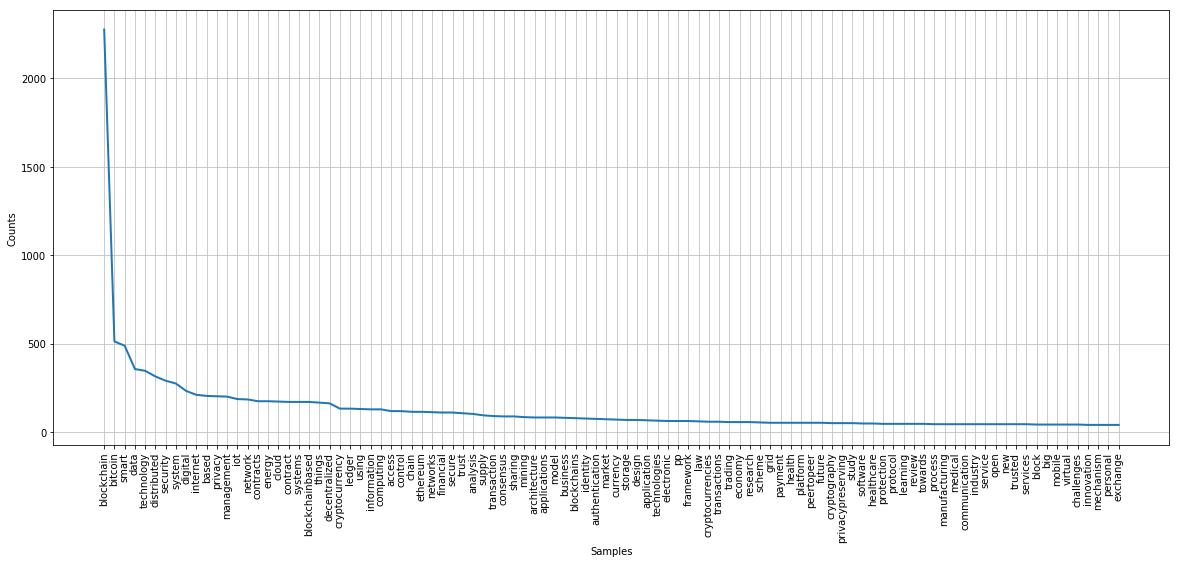

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))  # the size you want
#nltk.download()
allWords_ab = []
for wordList in ab:
    allWords_ab += wordList
    
freq = nltk.FreqDist(allWords_ab)
#plot top 50
freq.plot(100)